In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
#read data into dataframe
data_population = pd.read_excel('Resources/data.xlsx')
data_temperature = pd.read_excel('Resources/Salmon_Mean_temp_data.xlsx')


In [4]:
# Convert all values in the 'SPECIES' column to uppercase
data_population['SPECIES'] = data_population['SPECIES'].str.upper()

# Convert all values in the 'RUN_TIMING' column to uppercase
data_population['RUN_TIMING'] = data_population['RUN_TIMING'].str.upper()


In [5]:
# Drop unnecessary columns
columns_to_drop = ['CITATION', 'CONTRIBUTOR', 'DOCUMENT_CITATION', 'CODE_LINK', 'CATCH']
data_population = data_population.drop(columns=columns_to_drop)

In [7]:
# Drop rows with missing values
data_population_cleaned = data_population.dropna()

In [8]:
# Rename 'Recovery Domain' to 'Region' in PopulationData
data_population = data_population.rename(columns={'RECOVERY_DOMAIN': 'REGION'})


In [9]:
# Display the cleaned population data
data_population_cleaned.head()

,SERIES,NMFS_POPID,RECOVERY_DOMAIN,ESU,MAJOR_POPULATION_GROUP,POPULATION_NAME,COMMON_POPULATION_NAME,DISPLAY_ORDER,SPECIES,RUN_TIMING,...,NUMBER_OF_SPAWNERS,FRACWILD,AGE_1_RETURNS,AGE_2_RETURNS,AGE_3_RETURNS,AGE_4_RETURNS,AGE_5_RETURNS,AGE_6_RETURNS,AGE_7_RETURNS,METHOD
0,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,1096.0,0.050,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
1,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,946.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
2,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,2583.0,0.016,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
3,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,1279.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
4,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,582.0,0.077,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey


In [10]:
# Rename 'RECOVERY_DOMAIN' to 'Region' in data_population_cleaned
data_population_cleaned = data_population_cleaned.rename(columns={'RECOVERY_DOMAIN': 'REGION', 'Year': 'YEAR'})

# Check if the rename was successful
print(data_population_cleaned.columns)


Index(['SERIES', 'NMFS_POPID', 'REGION', 'ESU', 'MAJOR_POPULATION_GROUP',
       'POPULATION_NAME', 'COMMON_POPULATION_NAME', 'DISPLAY_ORDER', 'SPECIES',
       'RUN_TIMING', 'STREAM_NAME', 'YEAR', 'NUMBER_OF_SPAWNERS', 'FRACWILD',
       'AGE_1_RETURNS', 'AGE_2_RETURNS', 'AGE_3_RETURNS', 'AGE_4_RETURNS',
       'AGE_5_RETURNS', 'AGE_6_RETURNS', 'AGE_7_RETURNS', 'METHOD'],
      dtype='object')


In [14]:
data_temperature_cleaned = data_temperature.rename(columns={'Date MM/DD/YYYY': 'Date'})

#drop unnecessary columns and rename others as needed
data_temperature_cleaned = data_temperature_cleaned[['Region', 'Site Name', 'Site Number', 'Daily Mean Water temp. deg. C', 'Date']]
data_temperature_cleaned.columns = ['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE']


In [15]:
print(data_temperature_cleaned.columns)


Index(['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE'], dtype='object')


In [16]:
# Extract the year from the 'Date' column
data_temperature_cleaned['YEAR'] = data_temperature_cleaned['DATE'].dt.year

# Display the first few rows to verify the 'Year' column has been added
print(data_temperature_cleaned.head())

                      REGION                         SITE NAME  SITE_NUMBER  \
0  Willamette/Lower Columbia  Willamette River at Portland, OR     14211720   
1  Willamette/Lower Columbia  Willamette River at Portland, OR     14211720   
2  Willamette/Lower Columbia  Willamette River at Portland, OR     14211720   
3  Willamette/Lower Columbia  Willamette River at Portland, OR     14211720   
4  Willamette/Lower Columbia  Willamette River at Portland, OR     14211720   

   DAILY_MEAN_WATER_TEMP       DATE  YEAR  
0                    5.8 2013-01-01  2013  
1                    5.4 2013-01-02  2013  
2                    4.9 2013-01-03  2013  
3                    4.7 2013-01-04  2013  
4                    4.5 2013-01-05  2013  


In [17]:
print(data_temperature_cleaned.columns)

Index(['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE',
       'YEAR'],
      dtype='object')


In [18]:
# Display the cleaned temperature data
data_temperature_cleaned.head()

,REGION,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE,YEAR
0,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.8,2013-01-01,2013
1,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.4,2013-01-02,2013
2,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.9,2013-01-03,2013
3,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.7,2013-01-04,2013
4,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.5,2013-01-05,2013


In [19]:
# Display the cleaned population data
print("Cleaned Population Data:")
print(data_population_cleaned.head())

# Display the cleaned temperature data
print("\nCleaned Temperature Data:")
print(data_temperature_cleaned.head())


Cleaned Population Data:
          SERIES  NMFS_POPID                     REGION  \
0  LCchinook2020           1  Willamette/Lower Columbia   
1  LCchinook2020           1  Willamette/Lower Columbia   
2  LCchinook2020           1  Willamette/Lower Columbia   
3  LCchinook2020           1  Willamette/Lower Columbia   
4  LCchinook2020           1  Willamette/Lower Columbia   

                                          ESU MAJOR_POPULATION_GROUP  \
0  Salmon, Chinook (Lower Columbia River ESU)             Coast fall   
1  Salmon, Chinook (Lower Columbia River ESU)             Coast fall   
2  Salmon, Chinook (Lower Columbia River ESU)             Coast fall   
3  Salmon, Chinook (Lower Columbia River ESU)             Coast fall   
4  Salmon, Chinook (Lower Columbia River ESU)             Coast fall   

  POPULATION_NAME COMMON_POPULATION_NAME DISPLAY_ORDER         SPECIES  \
0       Big Creek                Big Ck.         1.1.3  CHINOOK SALMON   
1       Big Creek                Big Ck

In [20]:
# Export the cleaned population data to a CSV file
data_population_cleaned.to_csv('cleaned_population_data.csv', index=False)

# Export the cleaned temperature data to a CSV file
data_temperature_cleaned.to_csv('cleaned_temperature_data.csv', index=False)


In [24]:
# Merge the DataFrames on 'Region' and 'Year'
merged_data = pd.merge(data_population_cleaned, data_temperature_cleaned, how='inner', on=['REGION', 'YEAR'])

# Display the first few rows of the merged DataFrame
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159210 entries, 0 to 159209
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SERIES                  159210 non-null  object        
 1   NMFS_POPID              159210 non-null  int64         
 2   REGION                  159210 non-null  object        
 3   ESU                     159210 non-null  object        
 4   MAJOR_POPULATION_GROUP  159210 non-null  object        
 5   POPULATION_NAME         159210 non-null  object        
 6   COMMON_POPULATION_NAME  159210 non-null  object        
 7   DISPLAY_ORDER           159210 non-null  object        
 8   SPECIES                 159210 non-null  object        
 9   RUN_TIMING              159210 non-null  object        
 10  STREAM_NAME             159210 non-null  object        
 11  YEAR                    159210 non-null  int64         
 12  NUMBER_OF_SPAWNERS      159210

In [30]:
print(data_temperature_cleaned.columns)

Index(['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE',
       'YEAR'],
      dtype='object')


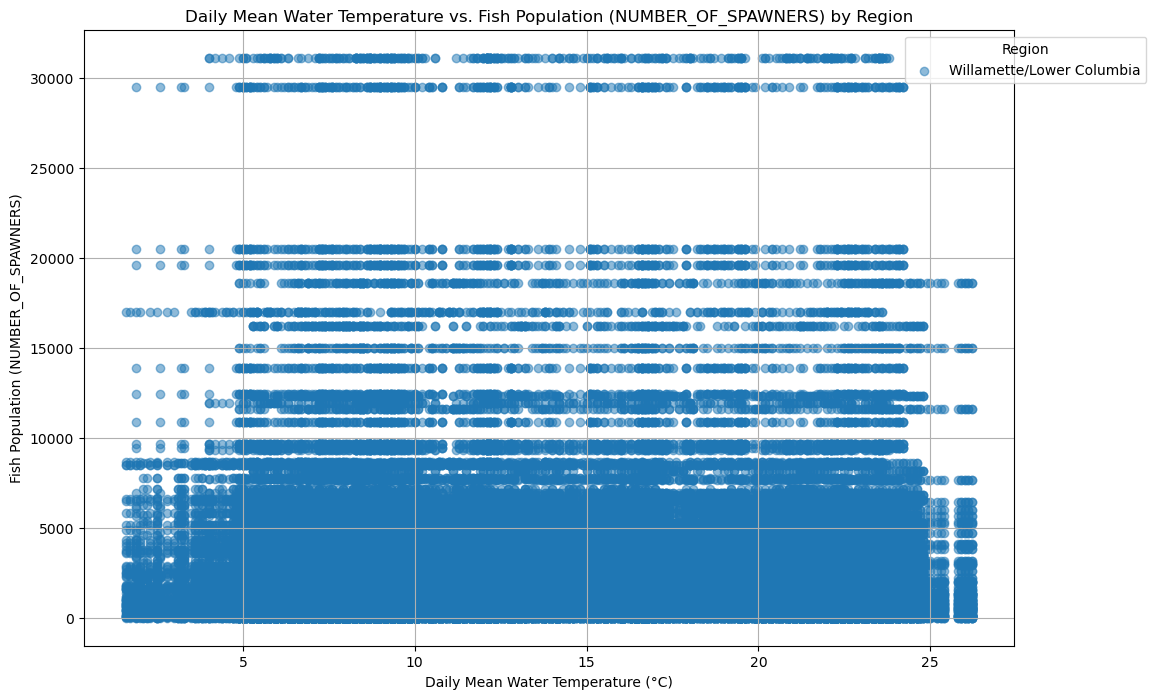

In [26]:
# Assuming 'merged_data' is your DataFrame after merging the population and temperature data
plt.figure(figsize=(12, 8))

# Get unique regions
regions = merged_data['REGION'].unique()

# Plot each region's data
for region in regions:
    region_data = merged_data[merged_data['REGION'] == region]
    plt.scatter(region_data['DAILY_MEAN_WATER_TEMP'], region_data['NUMBER_OF_SPAWNERS'], label=region, alpha=0.5)

# Add titles and labels
plt.title('Daily Mean Water Temperature vs. Fish Population (NUMBER_OF_SPAWNERS) by Region')
plt.xlabel('Daily Mean Water Temperature (°C)')
plt.ylabel('Fish Population (NUMBER_OF_SPAWNERS)')
plt.legend(title='Region', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)

# Show the plot
plt.show()

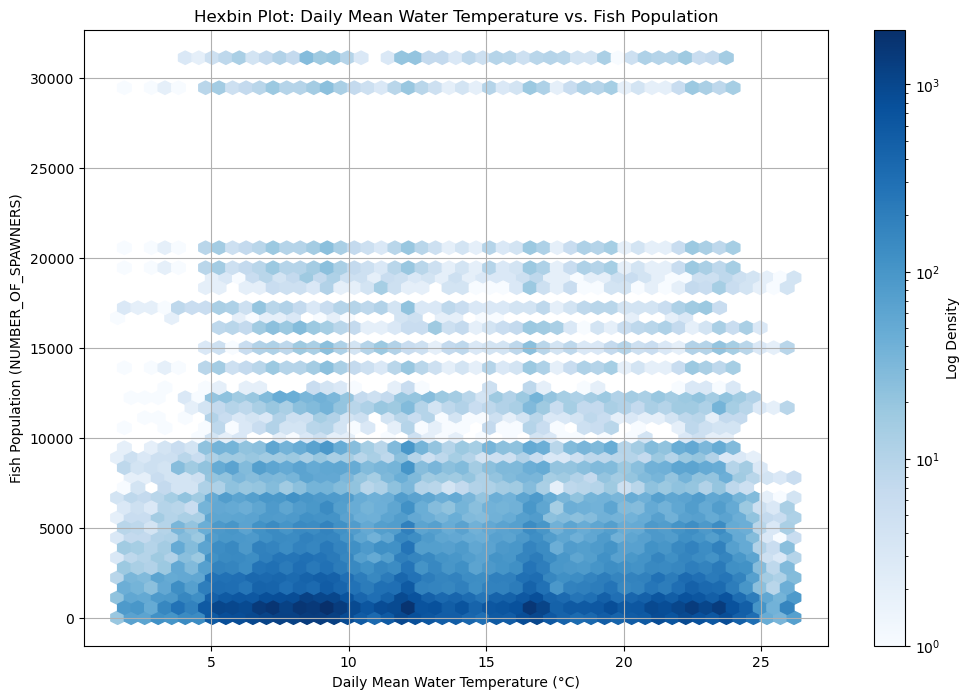

In [27]:
plt.figure(figsize=(12, 8))
plt.hexbin(merged_data['DAILY_MEAN_WATER_TEMP'], merged_data['NUMBER_OF_SPAWNERS'], gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='Log Density')
plt.title('Hexbin Plot: Daily Mean Water Temperature vs. Fish Population')
plt.xlabel('Daily Mean Water Temperature (°C)')
plt.ylabel('Fish Population (NUMBER_OF_SPAWNERS)')
plt.grid(True)
plt.show()


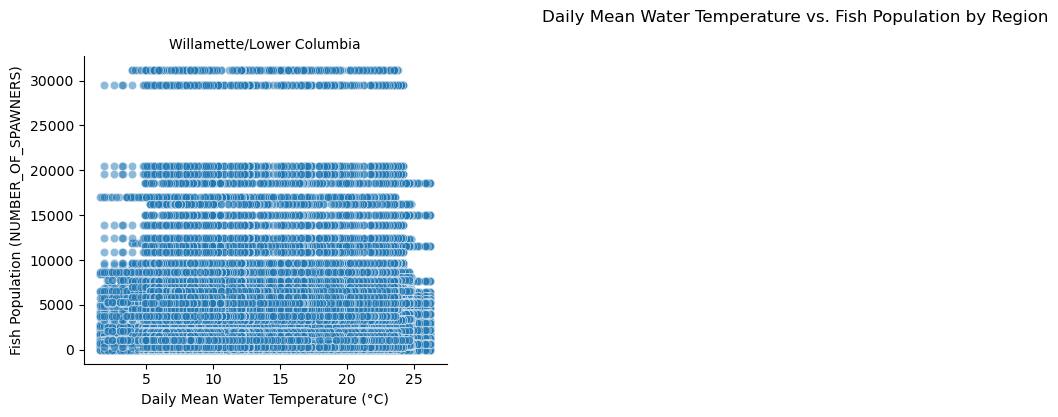

In [29]:
import seaborn as sns

g = sns.FacetGrid(merged_data, col="REGION", col_wrap=4, height=4)
g.map(sns.scatterplot, "DAILY_MEAN_WATER_TEMP", "NUMBER_OF_SPAWNERS", alpha=0.5)
g.set_axis_labels("Daily Mean Water Temperature (°C)", "Fish Population (NUMBER_OF_SPAWNERS)")
g.set_titles("{col_name}")
g.fig.suptitle('Daily Mean Water Temperature vs. Fish Population by Region', y=1.03)
plt.show()
